<a href="https://colab.research.google.com/github/Dhyanav/BrainSpy/blob/main/MRI_Viewer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Rquired Libraries

In [ ]:
!pip install pydicom
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.2 MB/s eta 0:00:00


In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import pydicom
import ipywidgets
from ipywidgets import interact
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Displaying .nii files

In [ ]:
img = nib.load('/content/drive/MyDrive/BrainSpy_BCS/Week_2/img_1.nii')

In [ ]:
print(img.affine)
affine = nib.orientations.aff2axcodes(img.affine) ## affine converts (i, j, k) index to (x, y, z) coordinates
print(affine) ## right to left    back to front(towards anterior)    top to bottom(towards superior)
## anterior is front of body and superior is towards top of head
print(img.header.keys())

data = img.get_fdata()
print(data.shape) ## voxels along x, y and z dir

spacing = img.header.get_zooms()
print(spacing) ## voxel size along x, y and z dir
print(img.get_data_dtype())

[[ 6.29074156e-01 -1.33072212e-02 -3.11387163e-02 -7.36054077e+01]
 [ 1.63442213e-02  6.21981978e-01  5.91654330e-02 -1.00073349e+02]
 [ 2.99664345e-02 -5.98863661e-02  6.21413589e-01 -1.19990189e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
('R', 'A', 'S')
['sizeof_hdr', 'data_type', 'db_name', 'extents', 'session_error', 'regular', 'dim_info', 'dim', 'intent_p1', 'intent_p2', 'intent_p3', 'intent_code', 'datatype', 'bitpix', 'slice_start', 'pixdim', 'vox_offset', 'scl_slope', 'scl_inter', 'slice_end', 'slice_code', 'xyzt_units', 'cal_max', 'cal_min', 'slice_duration', 'toffset', 'glmax', 'glmin', 'descrip', 'aux_file', 'qform_code', 'sform_code', 'quatern_b', 'quatern_c', 'quatern_d', 'qoffset_x', 'qoffset_y', 'qoffset_z', 'srow_x', 'srow_y', 'srow_z', 'intent_name', 'magic']
(256, 362, 384)
(np.float32(0.63), np.float32(0.625), np.float32(0.625))
int16


In [ ]:
def plot_slices(meta_data, index_array, size=(15,3)):
  figures, axes = plt.subplots(1, 3, figsize = size)
  img_slice = [ meta_data[index_array[0], :, :], meta_data[:, index_array[1], :], meta_data[:, :, index_array[2]] ]

  ## Sagittal ( Y-Z )
  axes[0].imshow(np.rot90(img_slice[0]), cmap='grey')
  axes[0].set_title("X-Axis slice")

  ## Coronal ( X-Z )
  axes[1].imshow(np.rot90(img_slice[1]), cmap='grey')
  axes[1].set_title("Y-Axis slice")

  # Axial ( X-Y )
  axes[2].imshow(np.rot90(img_slice[2], k=1), cmap='grey')
  axes[2].set_title("Z-Axis slice")

  plt.show()

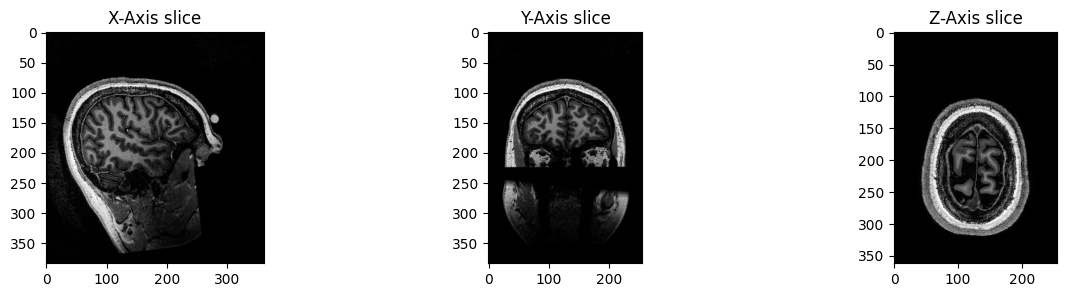

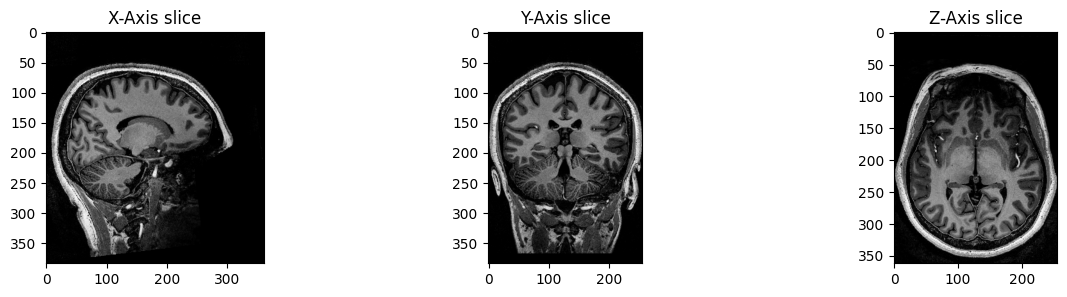

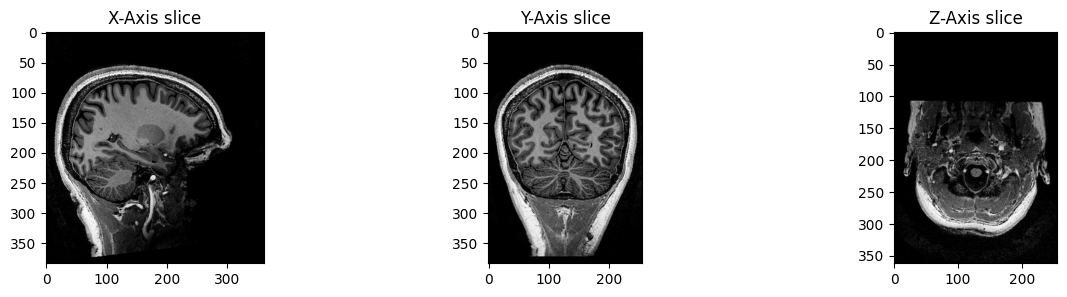

In [ ]:
plot_slices( data, [200, 250, 300])
plot_slices( data, [150, 130, 200])
plot_slices( data, [90, 90, 100])

# Slider using ipywidget

In [ ]:
def interactive_plot_slices(index_x, index_y, index_z):
    plot_slices(data, [index_x, index_y, index_z])

interact(
    interactive_plot_slices,
    index_x=ipywidgets.IntSlider(min=0, max=data.shape[0]-1, step=1, value=data.shape[0]//2, description='Slice X'),
    index_y=ipywidgets.IntSlider(min=0, max=data.shape[1]-1, step=1, value=data.shape[1]//2, description='Slice Y'),
    index_z=ipywidgets.IntSlider(min=0, max=data.shape[2]-1, step=1, value=data.shape[2]//2, description='Slice Z')
)
## min and max are range
## step is how much can we change
## value is initial value
## description is plt.set_title()

interactive(children=(IntSlider(value=128, description='Slice X', max=255), IntSlider(value=181, description='…

<function __main__.interactive_plot_slices(index_x, index_y, index_z)>

# Converting .nii into .dcm

In [ ]:
# slices = data.shape[2]
# os.makedirs('/content/drive/MyDrive/BrainSpy_BCS/Week_2/DICOM_Data/Img_1', exist_ok=True)

# for i in range(slices):
#   file_name = f'/content/drive/MyDrive/BrainSpy_BCS/Week_2/DICOM_Data/Img_1/Slice_{i:03d}.dcm'

#   meta = pydicom.dataset.FileMetaDataset()
#   meta.TransferSyntaxUID = pydicom.uid.ExplicitVRLittleEndian

#   dataset = pydicom.dataset.FileDataset(file_name, {}, file_meta=meta, preamble=b"\0" * 128 )

#   dataset.Modality = "MRI"
#   dataset.ContentDate = "20250530" ## YYYYMMDD
#   dataset.ContentTime = "105827" ## HHMMSS
#   dataset.PatientName = "Dhyanav Siddhapuria"
#   dataset.PatientID = "241013"
#   dataset.SliceLocation = i

#   pixel_data = data[:, :, i]
#   dataset.Rows, dataset.Columns = pixel_data.shape
#   dataset.PixelData = pixel_data.tobytes()
#   dataset.SamplesPerPixel = 1 # grayscale, 3 for RGB
#   dataset.BitsStored = 16
#   dataset.BitsAllocated = 16
#   dataset.HighBit = 15
#   dataset.PixelRepresentation = 1 # 0 for unsigned 1 for signed

#   dataset.save_as(file_name)

## commented so as to not re-run it

# Displaying .dcm files

In [ ]:
def return_dicom_slice(index):
  file_name = f'/content/drive/MyDrive/BrainSpy_BCS/Week_2/DICOM_Data/Img_1/Slice_{index:03d}.dcm'
  dicom_slice = pydicom.dcmread(file_name)
  return dicom_slice

In [ ]:
def return_pixel_data(index):
  slice_mri = return_dicom_slice(index)
  pixel_data = slice_mri.PixelData

  pixel_data = np.frombuffer(pixel_data, dtype=np.float64)
  pixel_data = pixel_data.reshape(slice_mri.Rows, slice_mri.Columns)

  return pixel_data

In [ ]:
def plot_dicom_slice(index):
  pixel_data = return_pixel_data(index)

  plt.imshow(pixel_data, cmap='gray')
  plt.show()

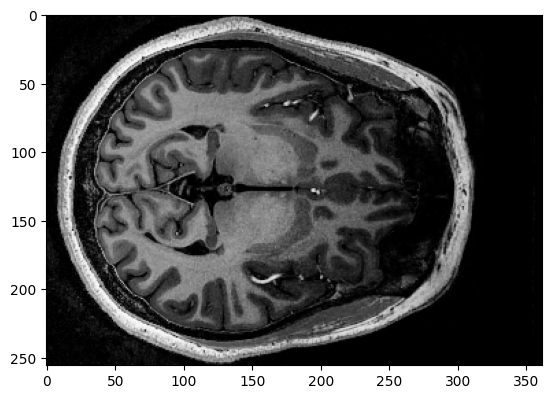

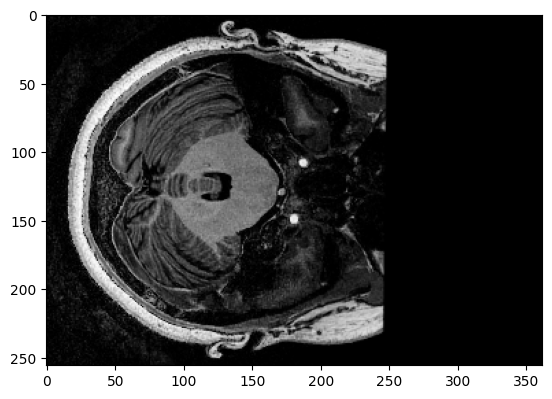

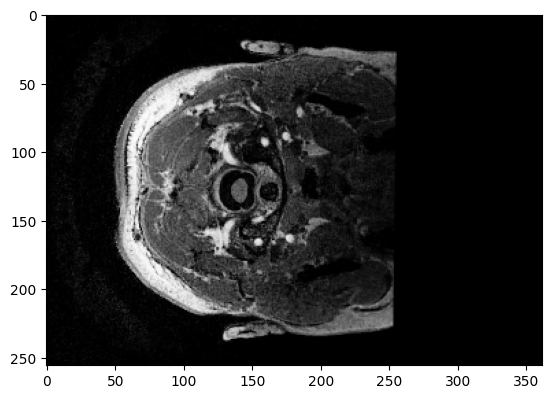

In [ ]:
plot_dicom_slice(200)
plot_dicom_slice(150)
plot_dicom_slice(90)

In [ ]:
voxel_data = []

num_slices = 0

for _file in os.listdir('/content/drive/MyDrive/BrainSpy_BCS/Week_2/DICOM_Data/Img_1'):
  if _file.endswith('.dcm'):
    num_slices += 1

for i in range(num_slices):
  voxel_data.append(return_pixel_data(i))

voxel_data = np.array(voxel_data)

print(voxel_data.shape)
print(data.shape)

(384, 256, 362)
(256, 362, 384)


In [ ]:
## voxel_data stored like this: voxel_data[n, : ,:] = n-th slice
##       data stored like this:       data[:, :, n] = n-th slice
## So, to maintain consistency, now we will convert voxel_data into same form as data.
#voxel_data = np.moveaxis(voxel_data, 0, -1) ## commented to not re-run it and move-axis again

print(voxel_data.shape)
print(data.shape)

(256, 362, 384)
(256, 362, 384)


In [ ]:
## to visualise, now we can use same function
plot_slices( voxel_data, [200, 250, 300], (15, 3) )
plot_slices( voxel_data, [150, 130, 200], (15, 3) )
plot_slices( voxel_data, [90, 90, 100], (15, 3) )


## Verified that both reuslts match.